In [1]:
pip install yfinance --upgrade --no-cache-dir

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/14/03/3c854ca3e02eedf614abba4b2e177c469bf3af58207fa30d5098c5d652fe/yfinance-0.2.37-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/73.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/73.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/73.0 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/73.0 kB 435.7 kB/s eta 0:00:01
   ---------------------- ----------------- 41.0/73.0 kB 281.8 kB/s eta 0:00:01
   ---------------------------------------- 73.0/73.0 kB 364.8 kB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.36
    Uninstalling yfinance-0.2.36:
      Successfully uninstalled yfinance-0.2.36
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import yfinance and datetime
import yfinance as yf
import datetime
import numpy as np

In [48]:
# collect the data from 2006-01-01 to Now

start = datetime.datetime(2020,1,1)
end = datetime.datetime(2022,10,1)
#end = datetime.datetime.today()

df = yf.download("SPY",start=start,end=end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,305.058472,59151200
2020-01-03,321.160004,323.640015,321.100006,322.410004,302.748444,77709700
2020-01-06,320.489990,323.730011,320.359985,323.640015,303.903473,55653900
2020-01-07,323.019989,323.540009,322.239990,322.730011,303.048920,40496400
2020-01-08,322.940002,325.779999,322.670013,324.450012,304.664062,68296000
...,...,...,...,...,...,...
2022-09-26,366.410004,370.209991,363.029999,364.309998,357.215485,92581200
2022-09-27,368.019989,370.399994,360.869995,363.380005,356.303650,108294100
2022-09-28,364.380005,372.299988,362.600006,370.529999,363.314392,110802200


In [49]:
# (Rename the column 'Adj Close'  to  'prc' )

In [50]:
df.rename(columns={'Adj Close':'prc'},inplace=True )

In [51]:
df.head()


,Open,High,Low,Close,prc,Volume
Date,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,305.058472,59151200
2020-01-03,321.160004,323.640015,321.100006,322.410004,302.748444,77709700
2020-01-06,320.489990,323.730011,320.359985,323.640015,303.903473,55653900
2020-01-07,323.019989,323.540009,322.239990,322.730011,303.048920,40496400
2020-01-08,322.940002,325.779999,322.670013,324.450012,304.664062,68296000


In [52]:
df.tail()

,Open,High,Low,Close,prc,Volume
Date,,,,,,
2022-09-26,366.410004,370.209991,363.029999,364.309998,357.215485,92581200
2022-09-27,368.019989,370.399994,360.869995,363.380005,356.303650,108294100
2022-09-28,364.380005,372.299988,362.600006,370.529999,363.314392,110802200
2022-09-29,366.809998,367.109985,359.700012,362.790009,355.725159,112952300
2022-09-30,361.799988,365.910004,357.040009,357.179993,350.224365,153711200


In [53]:
# step 02 generate a new column to get daily returns 'ret'
df['ret'] = df['prc']/df['prc'].shift(1)-1

In [54]:
df.head()

,Open,High,Low,Close,prc,Volume,ret
Date,,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,305.058472,59151200,NaN
2020-01-03,321.160004,323.640015,321.100006,322.410004,302.748444,77709700,-0.007572
2020-01-06,320.489990,323.730011,320.359985,323.640015,303.903473,55653900,0.003815
2020-01-07,323.019989,323.540009,322.239990,322.730011,303.048920,40496400,-0.002812
2020-01-08,322.940002,325.779999,322.670013,324.450012,304.664062,68296000,0.005330


In [55]:
# generate a new column to get daily  log returns 'log_ret'
df['log_ret']=np.log(1+df['ret']) 

In [56]:
df.head()

,Open,High,Low,Close,prc,Volume,ret,log_ret
Date,,,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,305.058472,59151200,NaN,NaN
2020-01-03,321.160004,323.640015,321.100006,322.410004,302.748444,77709700,-0.007572,-0.007601
2020-01-06,320.489990,323.730011,320.359985,323.640015,303.903473,55653900,0.003815,0.003808
2020-01-07,323.019989,323.540009,322.239990,322.730011,303.048920,40496400,-0.002812,-0.002816
2020-01-08,322.940002,325.779999,322.670013,324.450012,304.664062,68296000,0.005330,0.005315


In [57]:
#summary static of the data
df.describe()

,Open,High,Low,Close,prc,Volume,ret,log_ret
count,693.000000,693.000000,693.000000,693.000000,693.000000,6.930000e+02,692.000000,692.000000
mean,385.440519,388.112467,382.514084,385.452252,370.328456,8.984888e+07,0.000324,0.000200
std,57.266159,56.873569,57.490580,57.225782,58.040586,4.979118e+07,0.015755,0.015845
min,228.190002,229.679993,218.259995,222.949997,210.584900,2.645790e+07,-0.109424,-0.115886
25%,336.850006,338.640015,335.220001,337.059998,319.549011,5.803410e+07,-0.006298,-0.006318
50%,392.470001,395.649994,389.970001,392.339996,379.854523,7.639600e+07,0.001152,0.001151
75%,433.779999,436.769989,430.519989,434.450012,419.329742,1.054491e+08,0.008010,0.007978
max,479.220001,479.980011,476.059998,477.709991,463.045990,3.922207e+08,0.090603,0.086731


In [58]:
#step 03 create a new column to generate to return cumulative over rolling past 5 days
df['cumulative_ret']= np.exp(df['log_ret'].rolling(5).sum())-1

In [59]:
df.head()

,Open,High,Low,Close,prc,Volume,ret,log_ret,cumulative_ret
Date,,,,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,305.058472,59151200,NaN,NaN,NaN
2020-01-03,321.160004,323.640015,321.100006,322.410004,302.748444,77709700,-0.007572,-0.007601,NaN
2020-01-06,320.489990,323.730011,320.359985,323.640015,303.903473,55653900,0.003815,0.003808,NaN
2020-01-07,323.019989,323.540009,322.239990,322.730011,303.048920,40496400,-0.002812,-0.002816,NaN
2020-01-08,322.940002,325.779999,322.670013,324.450012,304.664062,68296000,0.005330,0.005315,NaN


In [60]:
# drop missing data rows
df = df.dropna()

In [61]:
df.head()

,Open,High,Low,Close,prc,Volume,ret,log_ret,cumulative_ret
Date,,,,,,,,,
2020-01-09,326.160004,326.730011,325.519989,326.649994,306.729858,48473300,0.006781,0.006758,0.005479
2020-01-10,327.290009,327.459991,325.200012,325.709991,305.847260,53029300,-0.002877,-0.002882,0.010236
2020-01-13,326.390015,327.959991,325.920013,327.950012,307.950623,47086800,0.006877,0.006854,0.013317
2020-01-14,327.470001,328.619995,326.839996,327.450012,307.481079,62832800,-0.001525,-0.001526,0.014625
2020-01-15,327.350006,329.019989,327.260010,328.190002,308.176025,72056600,0.002260,0.002258,0.011527


In [62]:
df.describe()

,Open,High,Low,Close,prc,Volume,ret,log_ret,cumulative_ret
count,688.000000,688.000000,688.000000,688.000000,688.000000,6.880000e+02,688.000000,688.000000,688.000000
mean,385.899898,388.576104,382.955465,385.901614,370.811332,9.006391e+07,0.000328,0.000203,0.001684
std,57.218696,56.818149,57.464553,57.189071,57.972899,4.989638e+07,0.015796,0.015886,0.032054
min,228.190002,229.679993,218.259995,222.949997,210.584900,2.645790e+07,-0.109424,-0.115886,-0.179693
25%,337.654999,339.095001,335.619995,337.560005,320.112274,5.804895e+07,-0.006298,-0.006318,-0.012137
50%,392.860001,395.879990,390.245010,392.615005,380.184326,7.643365e+07,0.001152,0.001151,0.005307
75%,434.717491,437.072510,430.702507,434.462494,419.407059,1.055958e+08,0.008085,0.008053,0.018492
max,479.220001,479.980011,476.059998,477.709991,463.045990,3.922207e+08,0.090603,0.086731,0.173581


In [63]:
# create long/short/hold signals
# If cumulative return in 5 days is greater than the 0.01 it should be long signal
# If cumulative return in 5 days is lower than the 0.01 it should be short signal
# Otherwise hold

conditions = [(df['cumulative_ret']>0.01),
              (df['cumulative_ret']<-0.01),
             
    
]

decision = [1,-1]


df['decision'] = np.select(conditions,decision,default= 0)

C:\Users\Lakshan Lahiru\AppData\Local\Temp\ipykernel_1520\532051875.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decision'] = np.select(conditions,decision,default= 0)


In [64]:
df

,Open,High,Low,Close,prc,Volume,ret,log_ret,cumulative_ret,decision
Date,,,,,,,,,,
2020-01-09,326.160004,326.730011,325.519989,326.649994,306.729858,48473300,0.006781,0.006758,0.005479,0
2020-01-10,327.290009,327.459991,325.200012,325.709991,305.847260,53029300,-0.002877,-0.002882,0.010236,1
2020-01-13,326.390015,327.959991,325.920013,327.950012,307.950623,47086800,0.006877,0.006854,0.013317,1
2020-01-14,327.470001,328.619995,326.839996,327.450012,307.481079,62832800,-0.001525,-0.001526,0.014625,1
2020-01-15,327.350006,329.019989,327.260010,328.190002,308.176025,72056600,0.002260,0.002258,0.011527,1
...,...,...,...,...,...,...,...,...,...,...
2022-09-26,366.410004,370.209991,363.029999,364.309998,357.215485,92581200,-0.009893,-0.009942,-0.062386,-1
2022-09-27,368.019989,370.399994,360.869995,363.380005,356.303650,108294100,-0.002553,-0.002556,-0.053920,-1
2022-09-28,364.380005,372.299988,362.600006,370.529999,363.314392,110802200,0.019676,0.019485,-0.018178,-1


In [65]:
count_long_signals = (df['decision'] == 1).sum()
count_short_signals = (df['decision'] == -1).sum()
hold = (df['decision'] == 0).sum()
print("Number of long signals:", count_long_signals)
print("Number of short signals:", count_short_signals)
print("Number of holds :",hold)
        

Number of long signals: 282
Number of short signals: 188
Number of holds : 218


In [66]:
#  calculate the cumulative trading profit
df["share"] = df['decision'].shift(1)
df["cum_share"] = df["share"].cumsum()
df["change_price"] = df["prc"].diff(1)
df["Profit"] = df["change_price"]*df["cum_share"]
df["cumu_Profit"] = df["Profit"].cumsum()
df.tail()


C:\Users\Lakshan Lahiru\AppData\Local\Temp\ipykernel_1520\3189698020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["share"] = df['decision'].shift(1)
C:\Users\Lakshan Lahiru\AppData\Local\Temp\ipykernel_1520\3189698020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cum_share"] = df["share"].cumsum()
C:\Users\Lakshan Lahiru\AppData\Local\Temp\ipykernel_1520\3189698020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,Open,High,Low,Close,prc,Volume,ret,log_ret,cumulative_ret,decision,share,cum_share,change_price,Profit,cumu_Profit
Date,,,,,,,,,,,,,,,
2022-09-26,366.410004,370.209991,363.029999,364.309998,357.215485,92581200,-0.009893,-0.009942,-0.062386,-1,-1.0,99.0,-3.569153,-353.346130,-921.509537
2022-09-27,368.019989,370.399994,360.869995,363.380005,356.303650,108294100,-0.002553,-0.002556,-0.053920,-1,-1.0,98.0,-0.911835,-89.359802,-1010.869339
2022-09-28,364.380005,372.299988,362.600006,370.529999,363.314392,110802200,0.019676,0.019485,-0.018178,-1,-1.0,97.0,7.010742,680.041992,-330.827347
2022-09-29,366.809998,367.109985,359.700012,362.790009,355.725159,112952300,-0.020889,-0.021110,-0.030543,-1,-1.0,96.0,-7.589233,-728.566406,-1059.393753
2022-09-30,361.799988,365.910004,357.040009,357.179993,350.224365,153711200,-0.015464,-0.015584,-0.029270,-1,-1.0,95.0,-5.500793,-522.575378,-1581.969131


In [67]:
cumu_Profit = df["cumu_Profit"]

In [68]:
cumu_Profit.iloc[-1]

-1581.9691314697266

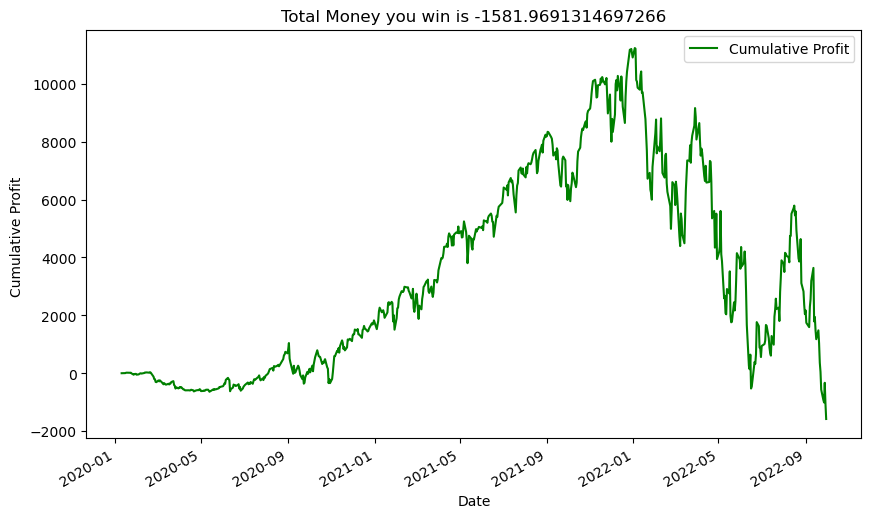

In [69]:
# Plot the cumulative graph


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.title("Total Money you win is " + str(cumu_Profit.iloc[-1]))
df["cumu_Profit"].plot(label='Cumulative Profit',color='green')
plt.legend()

plt.xlabel('Date')
plt.ylabel('Cumulative Profit ')
plt.show()